# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import h5py

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# Importing classification_report and confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.14.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Open the file as read only
data = h5py.File('/content/drive/MyDrive/DSML/Project/DLElective/SVHN_single_grey1.h5', 'r')

# Loading the training and test dataset
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

# Close the file
data.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print("No. of images in train dataset: ", X_train.shape)
print()
print("No. of images in test dataset: ", X_test.shape)

No. of images in train dataset:  (42000, 32, 32)

No. of images in test dataset:  (18000, 32, 32)


**Observation:**

The first dimension denotes the number of images in the dataset.
The second and third dimensions denotes the number of pixels along the height and the width of the 2D image.

Training data has 42,000 images and test data has 18,000 images, each image being a 32x32 square image.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

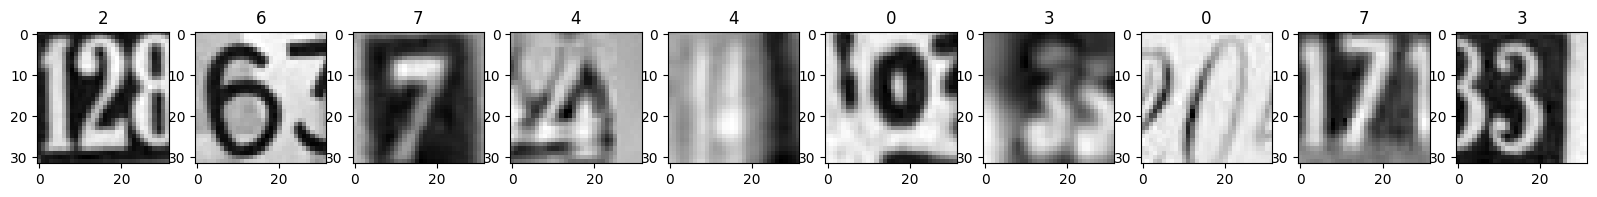

Labels for visuals: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images and printing their labels
num_classes=10                                                                  # Number of Classes
categories=np.unique(y_train)                                                   # Obtaing the unique classes from y_train
fig = plt.figure(figsize=(20, 4))                                               # Defining the figure size to 20X4
for i in range(10):
        ax = fig.add_subplot(1, 10, i +1)                                       # Adding subplots with 1 row and 10 columns
        ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))                        # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[i]])
plt.show()
print('Labels for visuals: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Printing the shape and the array of pixels for the first image in the training dataset
print("Shape of first image in the training dataset: ", X_train[0].shape)
print()
print("Array of first image in the training dataset:\n ", X_train[0])

Shape of first image in the training dataset:  (32, 32)

Array of first image in the training dataset:
  [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshape dataset to have a single channel
X_train_reshaped = X_train.reshape(X_train.shape[0], 1024)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalizing the image pixels - divide all the pixel values by 255 to standardize the images to have values between 0-1
X_train_normalized = X_train_reshaped.astype('float32')/255.0
X_test_normalized = X_test_reshaped.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
# Printing the shapes of traning and test data
print("Shape of training dataset: ", "X_train: ", X_train_normalized.shape, ", y_train: ", y_train.shape)
print()
print("Shape of test dataset: ", "X_test: ", X_test_normalized.shape, ", y_test: ", y_test.shape)

Shape of training dataset:  X_train:  (42000, 1024) , y_train:  (42000,)

Shape of test dataset:  X_test:  (18000, 1024) , y_test:  (18000,)


### **One-hot encode output**

In [ ]:
# Creating one-hot encoded representation of target labels using to_categorical() function
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Test labels
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

We create a one-hot encoded representation for the target classes. Each entry of target variable is a one-not encoded vector instead of single label.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def nn_model_1():
  # Initializing a sequential model
  ann_model = Sequential()

  # Flatten the input
  ann_model.add(Flatten(input_shape=(1024,)))

  # Adding a sequential layer with 64 neurons
  ann_model.add(Dense(64, activation='relu'))

  # Adding a sequential layer with 32 neurons
  ann_model.add(Dense(32, activation='relu'))

  # Adding the output layer with 10 neurons and activation function softmax
  ann_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  optz = Adam(learning_rate=0.001)

  # Compile model
  ann_model.compile(optimizer=optz,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  # Return the model
  return ann_model

In [ ]:
# Build the model
model1 = nn_model_1()

In [ ]:
# Print the summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
history1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 7ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

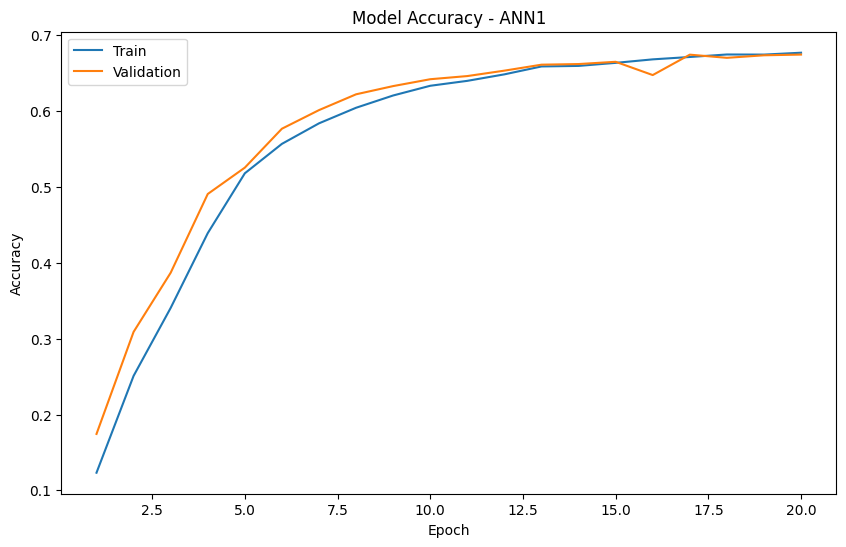

In [ ]:
# Plotting the accuracies
epochs_cnt = [i for i in range(1, 21)]
plt.figure(figsize = (10,6))
plt.plot(epochs_cnt, history1.history['accuracy'], label = 'accuracy')
plt.plot(epochs_cnt, history1.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy - ANN1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

We can see from the above plot that the model has perfomed well with a validation accuracy of 67%.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Define the model
def nn_model_2():
  # Initializing a sequential model
  ann_model = Sequential()

  # Flatten the input
  ann_model.add(Flatten(input_shape=(1024,)))

  # Adding a sequential layer with 256 neurons
  ann_model.add(Dense(256, activation='relu'))

  # Adding a sequential layer with 128 neurons
  ann_model.add(Dense(128, activation='relu'))

  # Dropout layer with the rate equal to 0.2
  ann_model.add(Dropout(0.2,input_shape=(1024,)))

  # Adding a sequential layer with 64 neurons
  ann_model.add(Dense(64, activation='relu'))

  # Adding a sequential layer with 64 neurons
  ann_model.add(Dense(64, activation='relu'))

  # Adding a sequential layer with 32 neurons
  ann_model.add(Dense(32, activation='relu'))

  # BatchNormalization layer
  ann_model.add(BatchNormalization())

  # Adding the output layer with 10 neurons and activation function softmax
  ann_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  optz = Adam(learning_rate=0.0005)

  # Compile model
  ann_model.compile(optimizer=optz,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  # Return model
  return ann_model

In [ ]:
# Build the model
model2 = nn_model_2()

In [ ]:
# Print the summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [ ]:
# Fit the model
history2 = model2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 6s 16ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 4s 17ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 2.1699 - accuracy: 0.1746 - val_loss: 2.0564 - val_accuracy: 0.2769
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.6402 - accuracy: 0.4238 - val_loss: 1.4454 - val_accuracy: 0.5273
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.3608 - accuracy: 0.5385 - val_loss: 1.3064 - val_accuracy: 0.5701
Epoch 6/30
263/263 [==============================] - 3s 13ms/step - loss: 1.2484 - accuracy: 0.5870 - val_loss: 1.1214 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 5s 17ms/step - loss: 1.1568 - accuracy: 0.6251 - val_loss: 1.1023 - val_accuracy: 0.6400

### **Plot the Training and Validation Accuracies and write down your Observations.**

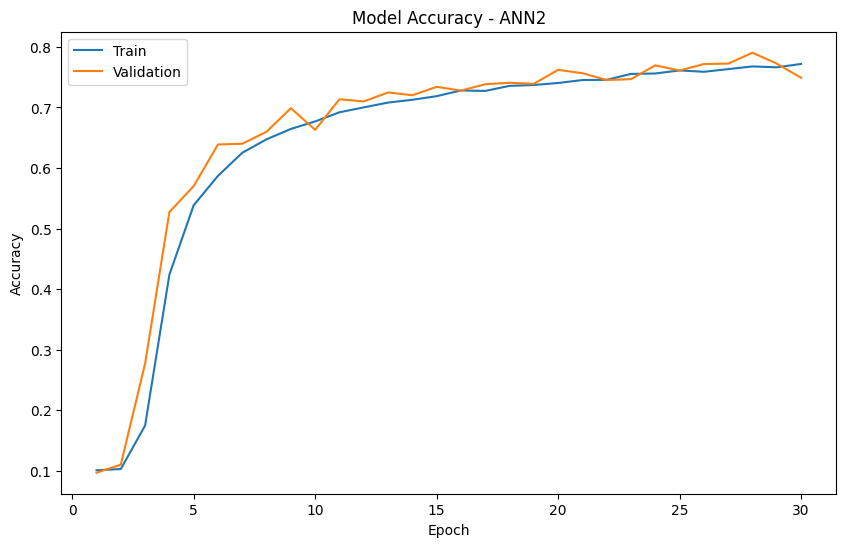

In [ ]:
# Plotting the accuracies
epochs_cnt = [i for i in range(1, 31)]
plt.figure(figsize = (10,6))
plt.plot(epochs_cnt, history2.history['accuracy'], label = 'accuracy')
plt.plot(epochs_cnt, history2.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy - ANN2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


We can see from the above plot that the model has perfomed well with a validation accuracy of 74%.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Output as probablities for each category
y_pred2=model2.predict(X_test_normalized)
# Obtaining the categorical values from y_pred
y_pred_arg=np.argmax(y_pred2,axis=1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Obtaining the categorical values from y_test_encoded
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1814
           1       0.59      0.89      0.71      1828
           2       0.76      0.77      0.76      1803
           3       0.78      0.67      0.72      1719
           4       0.73      0.85      0.79      1812
           5       0.82      0.67      0.73      1768
           6       0.76      0.72      0.74      1832
           7       0.75      0.82      0.78      1808
           8       0.71      0.71      0.71      1812
           9       0.83      0.65      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.76      0.74      0.74     18000
weighted avg       0.76      0.74      0.74     18000



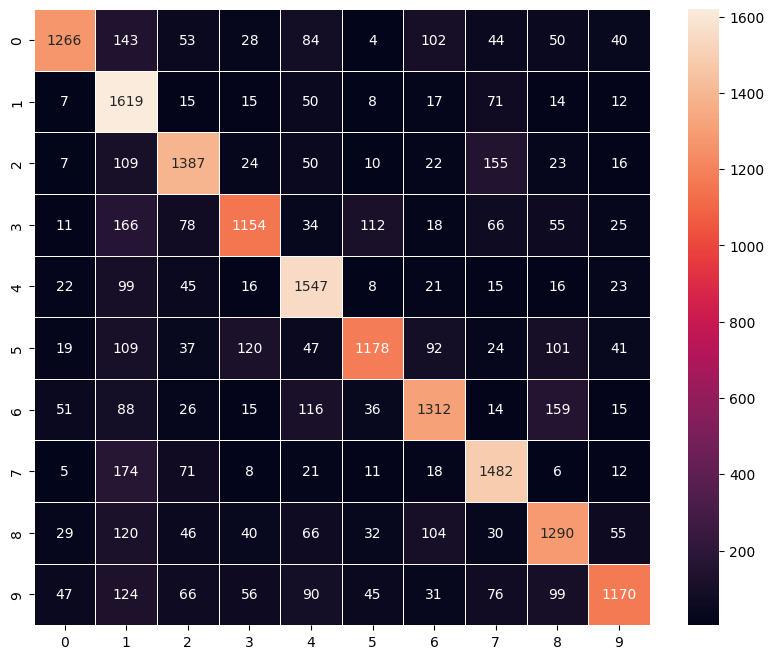

In [ ]:
# Printing the Classification report using classification_report() function
print(classification_report(y_test_arg,y_pred_arg))

# Plotting the Confusion Matrix heat map
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Final Observations:**

We observe from the above heatmap that most of the classes are predicted correctly, and the misclassification occurs mostly with the digit 6 which is sometimes confused with digit 8, digit 7 which is sometimes confused with digit 1, and digit 2 is sometimes confused with digit 7.

The total number of trainable parameters in the first model architecture: 68,010. The total number of trainable parameters in the second model architecture: 310,250.

The second model architecture (ANN2) has a better accuracy of 74% as compared to 67% from first model (ANN1). The second model architecture included more layers alongwith a dropout layer and batch normalization layer.



## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Open the file as read only
data1 = h5py.File('/content/drive/MyDrive/DSML/Project/DLElective/SVHN_single_grey1.h5', 'r')

# Loading the training and test dataset
X_train = data1['X_train'][:]
y_train = data1['y_train'][:]
X_test = data1['X_test'][:]
y_test = data1['y_test'][:]

# Close the file
data1.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print("No. of images in train dataset: ", X_train.shape)
print()
print("No. of images in test dataset: ", X_test.shape)

No. of images in train dataset:  (42000, 32, 32)

No. of images in test dataset:  (18000, 32, 32)


**Observation:**

The first dimension denotes the number of images in the training dataset.
The second and third dimensions denotes the number of pixels along the height and the width of the 2D image.

Training data has 42,000 images and test data has 18,000 images, each image being a 32x32 square image.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Printing the shape and the array of pixels for the first image in the training dataset
print("Shape of first image in training dataset: ", X_train[0].shape)
print()
print("Array of pixels in training dataset:\n ", X_train[0])

Shape of first image in training dataset:  (32, 32)

Array of pixels in training dataset:
  [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape dataset to have a single channel
X_train_reshaped = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing the image pixels - divide all the pixel values by 255 to standardize the images to have values between 0-1
X_train_normalized = X_train_reshaped.astype('float32')/255.0
X_test_normalized = X_test_reshaped.astype('float32')/255.0

Print New shape of Training and Test

In [ ]:
# Printing the shapes of traning and test data
print("Shape of training dataset: ", "X_train: ", X_train_normalized.shape, " y_train: ", y_train.shape)
print()
print("Shape of test dataset: ", "X_test: ", X_test_normalized.shape, " y_test: ", y_test.shape)

Shape of training dataset:  X_train:  (42000, 32, 32, 1)  y_train:  (42000,)

Shape of test dataset:  X_test:  (18000, 32, 32, 1)  y_test:  (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Creating one-hot encoded representation of target labels using to_categorical() function
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Test labels
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**

We create a one-hot encoded representation for the target classes. Each entry of target variable is a one-not encoded vector instead of single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def cnn_model_1():

  # Intializing a sequential model
  cnn_model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding conv layer with 32 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding max pooling to reduce the size of output of first conv layer
  cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

  # flattening the output of the conv layer
  cnn_model.add(Flatten())

  # Adding a fully connected dense layer with 32 neurons
  cnn_model.add(Dense(32))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding the output layer with 10 neurons and activation function softmax
  cnn_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  optz = Adam(learning_rate=0.001)

  # Compile model
  cnn_model.compile(optimizer=optz, loss='categorical_crossentropy', metrics=['accuracy'])

  # Reutrn model
  return cnn_model

In [ ]:
# Build the model
model3 = cnn_model_1()

In [ ]:
# Print the model
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Fit the model
history3 = model3.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size=32,
            verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 85s 80ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 73s 69ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 72s 69ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 74s 70ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 70s 67ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 69s 65ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 68s 65ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plot the Training and Validation Accuracies and Write your observations.**

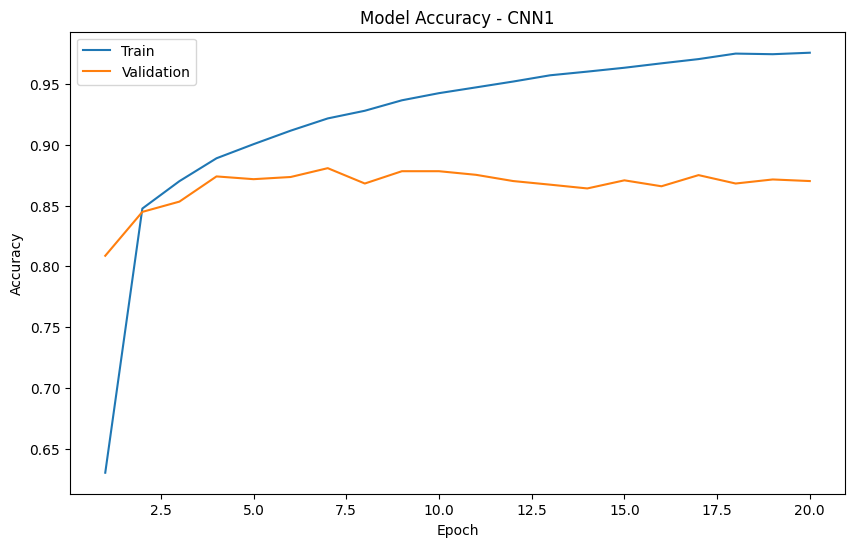

In [ ]:
# Plotting the accuracies
epochs_cnt = [i for i in range(1, 21)]
plt.figure(figsize = (10,6))
plt.plot(epochs_cnt, history3.history['accuracy'], label = 'accuracy')
plt.plot(epochs_cnt, history3.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy - CNN1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

*   We can see from the above plot that the model has perfomed well on train and validation data with a validation accuracy of 87%.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def cnn_model_2():
  # Intializing a sequential model
  cnn_model = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding conv layer with 32 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding max pooling
  cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

  # Adding BatchNormalization
  cnn_model.add(BatchNormalization())

  # Adding conv layer with 32 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(32, (3, 3), padding="same"))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding conv layer with 64 filters and kernel size 3x3 , padding 'same'
  cnn_model.add(Conv2D(64, (3, 3), padding="same"))

  # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Adding max pooling
  cnn_model.add(MaxPooling2D((2, 2), padding = 'same'))

  # Adding BatchNormalization
  cnn_model.add(BatchNormalization())

  # flattening the output from previous layer
  cnn_model.add(Flatten())

  # Adding a fully connected dense layer
  cnn_model.add(Dense(32))

   # LeakyRelu layer with the slope equal to 0.1
  cnn_model.add(LeakyReLU(alpha = 0.1))

  # Dropout layer with the rate equal to 0.5
  cnn_model.add(Dropout(.5))

  # Adding the output layer with 10 neurons and activation functions as softmax
  cnn_model.add(Dense(10, activation='softmax'))

  # Using Adam Optimizer
  optz = Adam(learning_rate=0.001)

  # Compile model
  cnn_model.compile(optimizer=optz, loss='categorical_crossentropy', metrics=['accuracy'])

  # Return the model
  return cnn_model

In [ ]:
# Build the model
model4 = cnn_model_2()

In [ ]:
# Print the summary
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model
history4 = model4.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 126s 473ms/step - loss: 1.3222 - accuracy: 0.5483 - val_loss: 2.1225 - val_accuracy: 0.2112
Epoch 2/30
263/263 [==============================] - 124s 470ms/step - loss: 0.6654 - accuracy: 0.7950 - val_loss: 0.6373 - val_accuracy: 0.8208
Epoch 3/30
263/263 [==============================] - 124s 471ms/step - loss: 0.5528 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8737
Epoch 4/30
263/263 [==============================] - 123s 468ms/step - loss: 0.4908 - accuracy: 0.8507 - val_loss: 0.3992 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 123s 470ms/step - loss: 0.4349 - accuracy: 0.8633 - val_loss: 0.3909 - val_accuracy: 0.8885
Epoch 6/30
263/263 [==============================] - 124s 474ms/step - loss: 0.4038 - accuracy: 0.8755 - val_loss: 0.4107 - val_accuracy: 0.8852
Epoch 7/30
263/263 [==============================] - 123s 468ms/step - loss: 0.3835 - accuracy: 0.8814 - val_loss: 0.3952 -

### **Plot the Training and Validation accuracies and write your observations.**

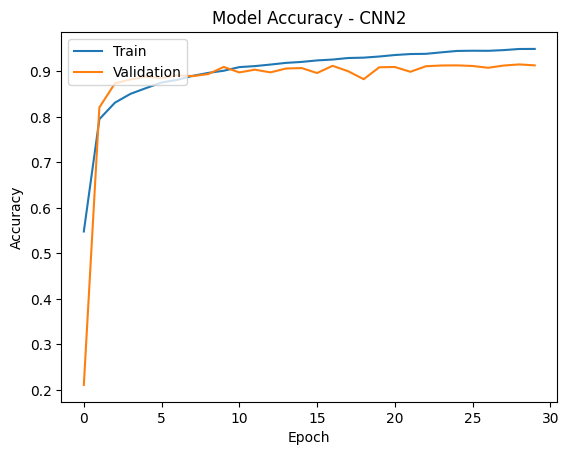

In [ ]:
# Plotting the accuracies
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy - CNN2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

We can see from the above plot that the model has perfomed well with a validation accuracy of 91%.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Output as probablities for each category
y_pred4=model4.predict(X_test_normalized)
# Obtaining the categorical values from y_pred
y_pred_arg=np.argmax(y_pred4,axis=1)

563/563 [==============================] - 16s 29ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Obtaining the categorical values from y_test_encoded
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



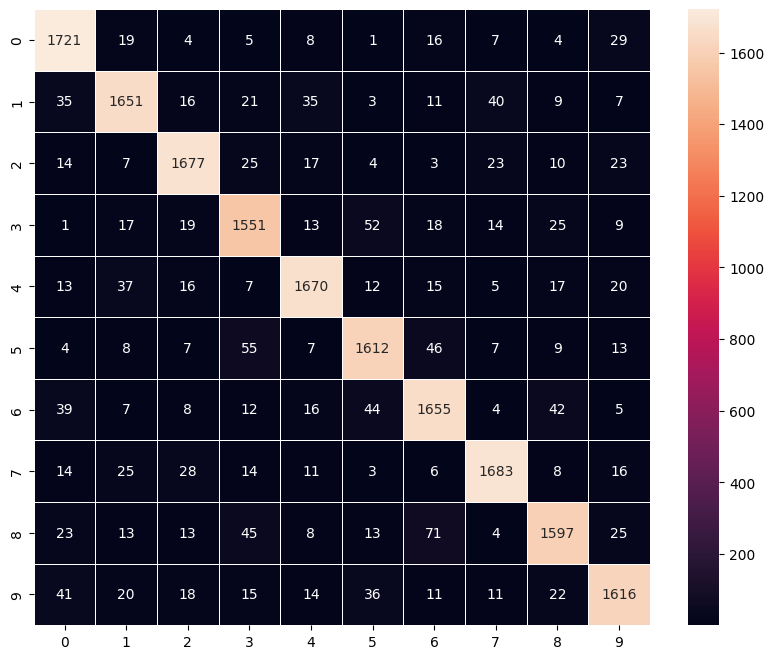

In [ ]:
# Printing the Classification report using classification_report() function
print(classification_report(y_test_arg,y_pred_arg))

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Final Observations:**

We observe from the above heatmap that most of the classes are predicted correctly, the misclassification occurs mostly with the digit 5 which is sometimes confused with digit 3.

The total number of trainable parameters in the first model architecture: 267,306. The total number of trainable parameters in the second model architecture: 164,362.

The second model architecture (CNN2) has a better accuracy of 91% as compared to 87% from first model (CNN1). The second model architecture included more layers alongwith a dropout layer and two batch normalization layers.
The CNN models performs better than the ANN models. The CNN models are computationally efficient and they make use of spatial nature of information in images.